# Example Implementations of `HARK.ConsumptionSaving.ConsRiskyAssetModel`

In [5]:
from time import time

from HARK.ConsumptionSaving.ConsIndShockModel import (
    IndShockConsumerType,
    IndShockConsumerType_constructors_default,
)
from HARK.ConsumptionSaving.ConsPortfolioModel import (
    PortfolioConsumerType,
    init_portfolio,
)
from HARK.ConsumptionSaving.ConsRiskyAssetModel import (
    FixedPortfolioShareRiskyAssetConsumerType,
    RiskyAssetConsumerType,
    IndShockRiskyAssetConsumerType_constructor_default,
)
from HARK.utilities import plot_funcs, plot_funcs_der

In [6]:
mystr = lambda number: f"{number:.4f}"

## Idiosyncratic Income Shocks Consumer Type

In [7]:
# Make a dictionary for the idiosyncratic shocks type that uses common values from the portfolio type
common_dict = init_portfolio.copy()
common_dict["constructors"] = IndShockConsumerType_constructors_default

In [8]:
# Make and solve an example consumer with idiosyncratic income shocks
# Use init_portfolio parameters to compare to results of PortfolioConsumerType
IndShockExample = IndShockConsumerType(**common_dict)
IndShockExample.cycles = 0  # Make this type have an infinite horizon

In [9]:
start_time = time()
IndShockExample.solve()
end_time = time()
print(
    "Solving a consumer with idiosyncratic shocks took "
    + mystr(end_time - start_time)
    + " seconds.",
)
IndShockExample.unpack("cFunc")

Solving a consumer with idiosyncratic shocks took 0.4473 seconds.


Concave consumption function:


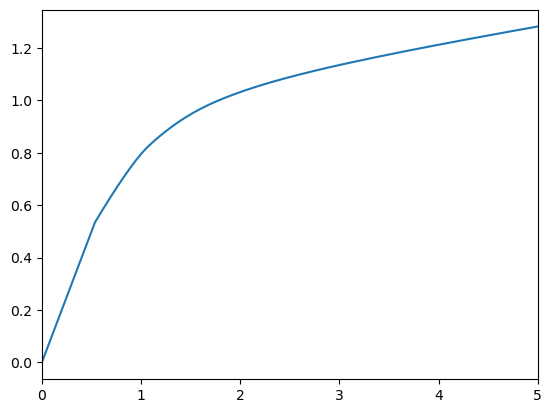

Marginal consumption function:


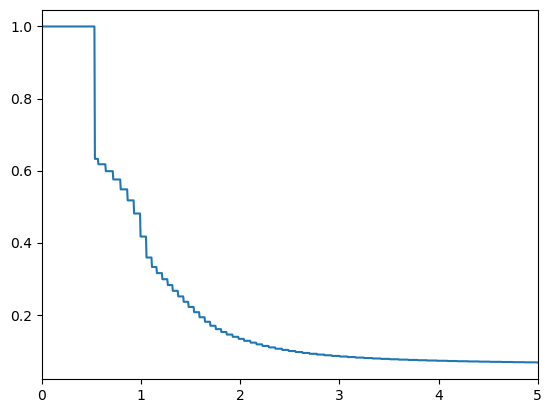

In [10]:
# Plot the consumption function and MPC for the infinite horizon consumer
print("Concave consumption function:")
plot_funcs(IndShockExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(IndShockExample.cFunc[0], 0.0, 5.0)

## Risky Return Consumer Type

In [11]:
# Make and solve an example consumer with risky returns to savings
# Use init_portfolio parameters to compare to results of PortfolioConsumerType
temp_dict = init_portfolio.copy()
temp_dict["constructors"] = IndShockRiskyAssetConsumerType_constructor_default
RiskyReturnExample = RiskyAssetConsumerType(**temp_dict)
RiskyReturnExample.cycles = 0  # Make this type have an infinite horizon

In [12]:
start_time = time()
RiskyReturnExample.solve()
end_time = time()
print(
    "Solving a consumer with risky returns took "
    + mystr(end_time - start_time)
    + " seconds.",
)
RiskyReturnExample.unpack("cFunc")

Solving a consumer with risky returns took 0.4987 seconds.


Concave consumption function:


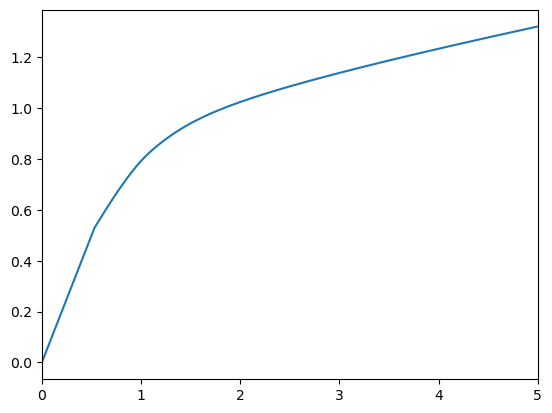

Marginal consumption function:


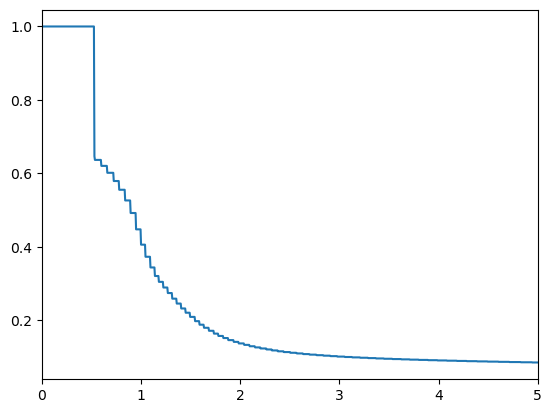

In [13]:
# Plot the consumption function and MPC for the risky asset consumer
print("Concave consumption function:")
plot_funcs(RiskyReturnExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(RiskyReturnExample.cFunc[0], 0.0, 5.0)

## Compare Idiosyncratic Income Shocks with Risky Return

Consumption functions for idiosyncratic shocks vs risky returns:


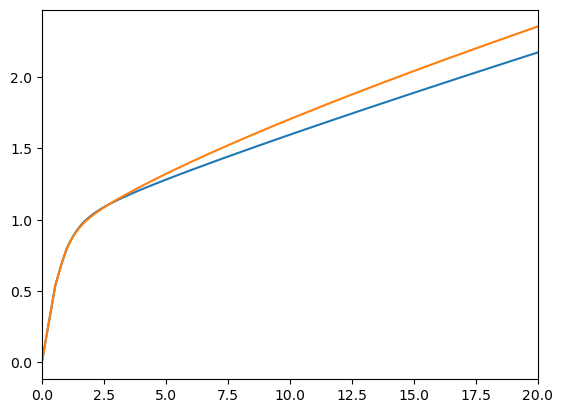

In [14]:
# Compare the consumption functions for the various agents in this notebook.
print("Consumption functions for idiosyncratic shocks vs risky returns:")
plot_funcs(
    [
        IndShockExample.cFunc[0],  # blue
        RiskyReturnExample.cFunc[0],  # orange
    ],
    0.0,
    20.0,
)

## Risky Return Consumer Type with Portfolio Choice

In [15]:
# Make and solve an example risky consumer with a portfolio choice
temp_dict["PortfolioBool"] = True
PortfolioChoiceExample = RiskyAssetConsumerType(**temp_dict)
PortfolioChoiceExample.cycles = 0  # Make this type have an infinite horizon

In [16]:
start_time = time()
PortfolioChoiceExample.solve()
end_time = time()
print(
    "Solving a consumer with risky returns and portfolio choice took "
    + mystr(end_time - start_time)
    + " seconds.",
)
PortfolioChoiceExample.unpack("cFunc")
PortfolioChoiceExample.unpack("ShareFunc")

Solving a consumer with risky returns and portfolio choice took 4.1953 seconds.


Concave consumption function:


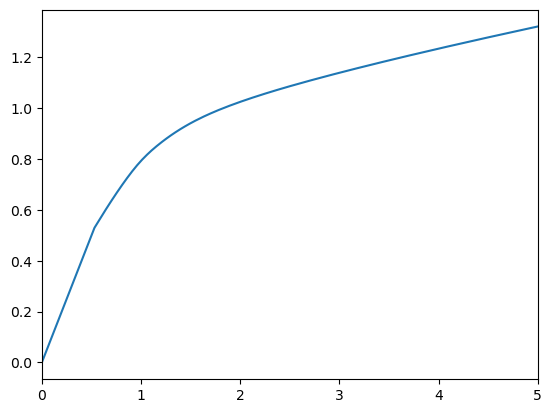

Marginal consumption function:


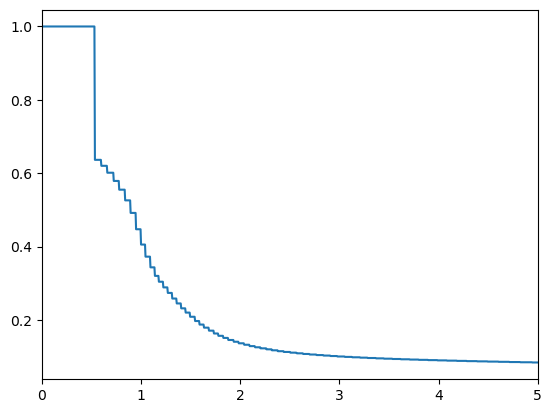

In [17]:
# Plot the consumption function and MPC for the portfolio choice consumer
print("Concave consumption function:")
plot_funcs(PortfolioChoiceExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(PortfolioChoiceExample.cFunc[0], 0.0, 5.0)

## Compare Income Shocks, Risky Return, and RR w/ Portfolio Choice

Consumption functions for idiosyncratic shocks vs risky returns vs portfolio choice:


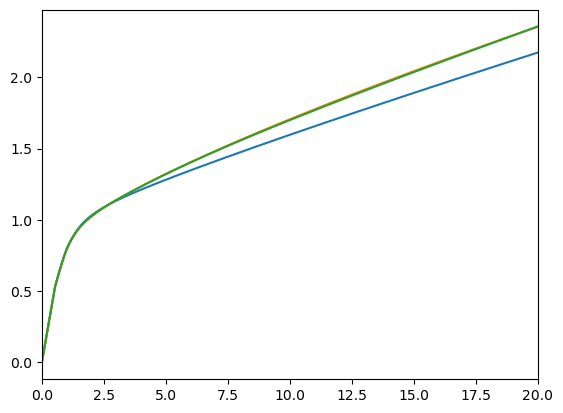

In [18]:
# Compare the consumption functions for the various agents in this notebook.
print(
    "Consumption functions for idiosyncratic shocks vs risky returns vs portfolio choice:",
)
plot_funcs(
    [
        IndShockExample.cFunc[0],  # blue
        RiskyReturnExample.cFunc[0],  # orange
        PortfolioChoiceExample.cFunc[0],  # green
    ],
    0.0,
    20.0,
)

## Portfolio Consumer Type

In [19]:
# Make and solve an example portfolio choice consumer
PortfolioTypeExample = PortfolioConsumerType(**init_portfolio)  # default parameters
PortfolioTypeExample.cycles = 0  # Make this type has an infinite horizon

In [20]:
start_time = time()
PortfolioTypeExample.solve()
end_time = time()
print(
    "Solving a consumer with portfolio choice took "
    + mystr(end_time - start_time)
    + " seconds.",
)
PortfolioTypeExample.unpack("cFuncAdj")
PortfolioTypeExample.unpack("ShareFuncAdj")

Solving a consumer with portfolio choice took 10.7557 seconds.


Concave consumption function:


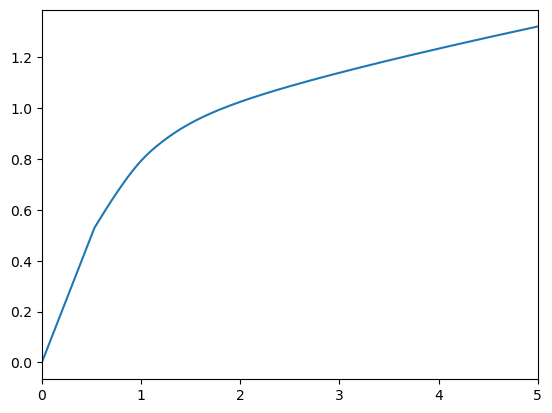

Marginal consumption function:


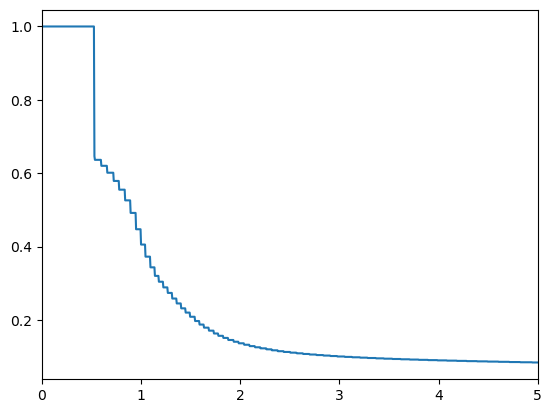

In [21]:
# Plot the consumption function and MPC for the portfolio choice consumer
print("Concave consumption function:")
plot_funcs(PortfolioTypeExample.cFuncAdj[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(PortfolioTypeExample.cFuncAdj[0], 0.0, 5.0)

## Compare RR w/ Portfolio Choice with Portfolio Choice Type

Consumption functions for portfolio choice type vs risky asset with portfolio choice:


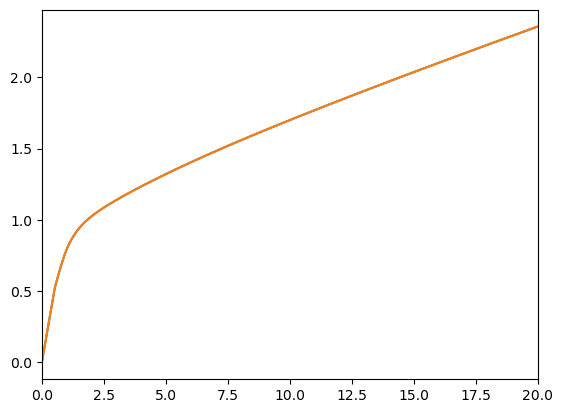

In [22]:
# Compare the consumption functions for the various portfolio choice types.
print(
    "Consumption functions for portfolio choice type vs risky asset with portfolio choice:",
)
plot_funcs(
    [
        PortfolioTypeExample.cFuncAdj[0],  # blue
        PortfolioChoiceExample.cFunc[0],  # orange
    ],
    0.0,
    20.0,
)

Share functions for portfolio choice type vs risky asset with portfolio choice:


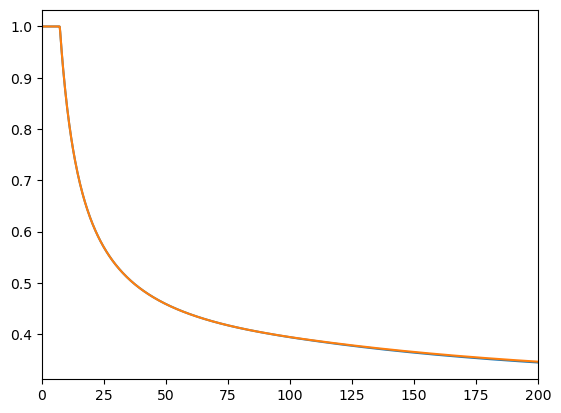

In [23]:
# Compare the share functions for the various portfolio choice types.
print("Share functions for portfolio choice type vs risky asset with portfolio choice:")
plot_funcs(
    [
        PortfolioTypeExample.ShareFuncAdj[0],  # blue
        PortfolioChoiceExample.ShareFunc[0],  # orange
    ],
    0,
    200,
)

## Risky Return Given Fixed Portfolio Share

In [24]:
FixedShareExample = FixedPortfolioShareRiskyAssetConsumerType(**temp_dict)
FixedShareExample.cycles = 0

In [25]:
start_time = time()
FixedShareExample.solve()
end_time = time()
print(
    "Solving a consumer with fixed portfolio share took "
    + mystr(end_time - start_time)
    + " seconds.",
)
FixedShareExample.unpack("cFunc")

Solving a consumer with fixed portfolio share took 0.7053 seconds.


Concave consumption function:


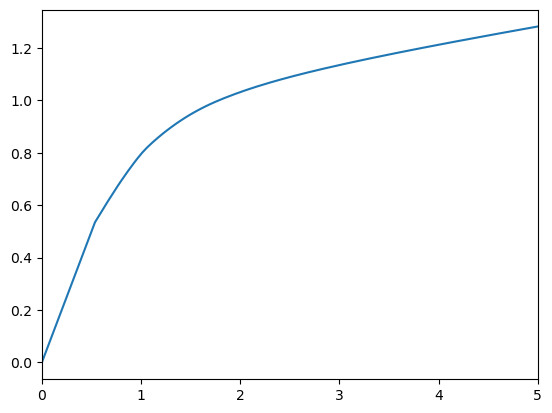

Marginal consumption function:


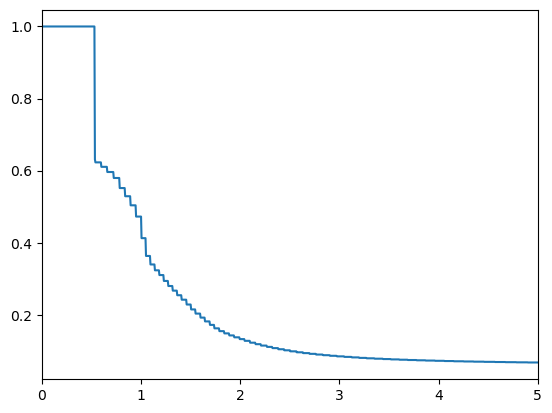

In [26]:
# Plot the consumption function and MPC for the infinite horizon consumer
print("Concave consumption function:")
plot_funcs(FixedShareExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(FixedShareExample.cFunc[0], 0.0, 5.0)

## Compare Idiosyncratic Shock Type with Fixed Share at 0.0 Type

Consumption functions for idiosyncratic shocks vs fixed share at 0.0:


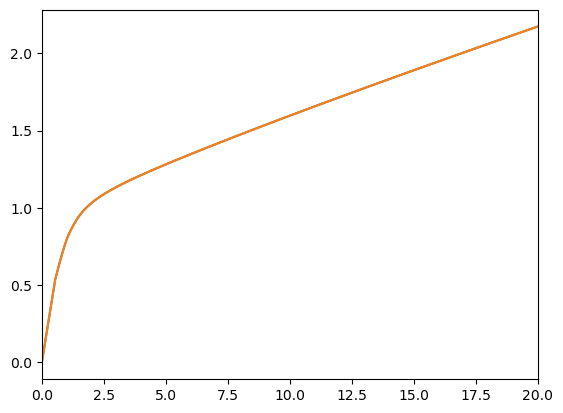

In [27]:
# Compare the consumption functions for the various idiosyncratic shocks
print("Consumption functions for idiosyncratic shocks vs fixed share at 0.0:")
plot_funcs(
    [
        IndShockExample.cFunc[0],  # blue
        FixedShareExample.cFunc[0],  # orange
    ],
    0.0,
    20.0,
)

## Fixed Share at 1.0 Type

In [28]:
temp_dict["RiskyShareFixed"] = [1.0]
RiskyFixedExample = FixedPortfolioShareRiskyAssetConsumerType(**temp_dict)
RiskyFixedExample.cycles = 0

In [29]:
start_time = time()
RiskyFixedExample.solve()
end_time = time()
print(
    "Solving a consumer with share fixed at 1.0 took "
    + mystr(end_time - start_time)
    + " seconds.",
)
RiskyFixedExample.unpack("cFunc")

Solving a consumer with share fixed at 1.0 took 0.6070 seconds.


Concave consumption function:


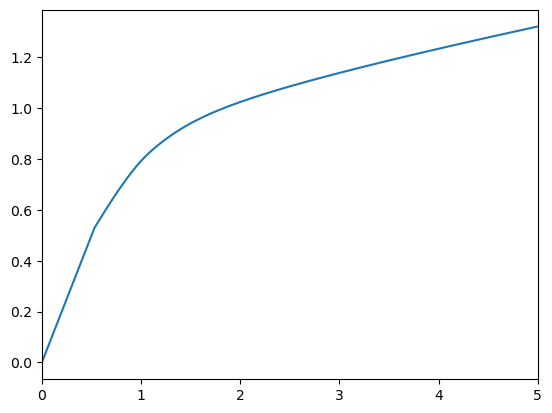

Marginal consumption function:


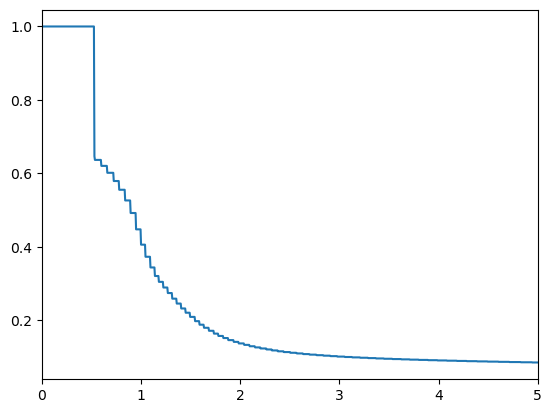

In [30]:
# Plot the consumption function and MPC for the portfolio choice consumer
print("Concave consumption function:")
plot_funcs(RiskyFixedExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(RiskyFixedExample.cFunc[0], 0.0, 5.0)

## Compare Fixed Share at 1.0 Type with Risky Return Type

Consumption functions for risky asset vs fixed share at 1.0:


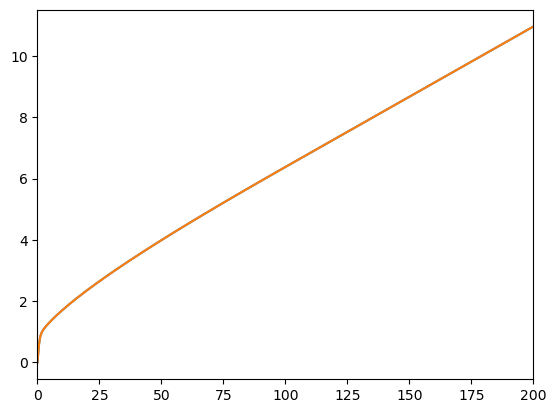

In [31]:
# Compare the consumption functions for the various risky shocks
print("Consumption functions for risky asset vs fixed share at 1.0:")
plot_funcs(
    [
        RiskyReturnExample.cFunc[0],  # blue
        RiskyFixedExample.cFunc[0],  # orange
    ],
    0.0,
    200.0,
)